<a href="https://colab.research.google.com/github/EtheSonX082531/PYTHON-CODES-AND-PROJECTS/blob/main/NumberGuessing_By_Agent_(LoopingInLanggraph).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [163]:
from typing import TypedDict
import random
from langgraph.graph import StateGraph,START,END

In [164]:
class AgentState(TypedDict):
      name:str
      guess:int
      attempts:int
      lower_bound:int
      upper_bound:int
      secret_num:int

In [165]:
def setup(state:AgentState)->AgentState:
    state["attempts"]=0
    state["lower_bound"]=0
    state["upper_bound"]=20
    return state

In [166]:
def guess_node(state:AgentState)-> AgentState :
      state["attempts"]+=1
      state["guess"]=random.randint(state["lower_bound"],state["upper_bound"])

      if(state["guess"] == state["secret_num"]):
        print(f"Hi there, {state['name']}\nSecret Numer guessed Successfully,after Attempts: {state['attempts']}\nSecret Number is: {state['guess']}")

      return state


In [167]:
def guess_router(state:AgentState)->str:
     if(state["guess"]==state["secret_num"]):
          return "end_edge"
     elif(state["attempts"] >= 7):
         return "end_edge"
     else:
          return "loop_edge"

In [168]:
def hint_node(state:AgentState)->AgentState:
  if(state["guess"]<state["secret_num"]):
       state["lower_bound"]=state["guess"]+1
  else:
     state["upper_bound"]=state["guess"]-1

  return state

In [169]:
graph=StateGraph(AgentState)

graph.add_node("setup",setup)
graph.add_node("guess_node",guess_node)
graph.add_node("hint_node",hint_node)



In [170]:
graph.add_edge(START,"setup")
graph.add_edge("setup","guess_node")


graph.add_conditional_edges(
    "guess_node",
    guess_router,
    {
        "loop_edge":"hint_node",
        "end_edge":END
    }
)

graph.add_edge("hint_node","guess_node")

In [171]:
app=graph.compile()

output=app.invoke({"name":"Anik Roy","secret_num":19})

Hi there, Anik Roy
Secret Numer guessed Successfully,after Attempts: 2
Secret Number is: 19


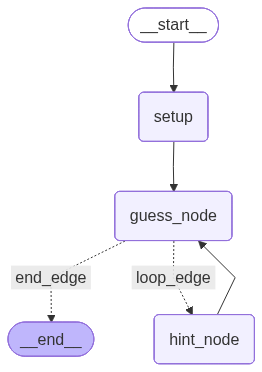

In [172]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))
